In [280]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.applications import imagenet_utils
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from IPython.display import Image

import pathlib
from pathlib import Path

In [281]:
mobile = keras.applications.mobilenet.MobileNet()

In [282]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size = (224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis = 0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [283]:
def calculate_prediction(file_image):
    img = mpimg.imread(file_image)
    preprocessed_image = prepare_image(file_image)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    return results, img

In [284]:
borzoi = 'data/archive/images/15-n02090622-borzoi/train/n02090622_10281.jpg'
chihuahua = 'data/archive/images/50-n02085620-Chihuahua/train/n02085620_10131.jpg'
german_shepherd = 'data/archive/images/100-n02106662-German_shepherd/train/n02106662_10338.jpg'
dog_list = [borzoi, chihuahua, german_shepherd]

data/archive/images/15-n02090622-borzoi/train/n02090622_10281.jpg


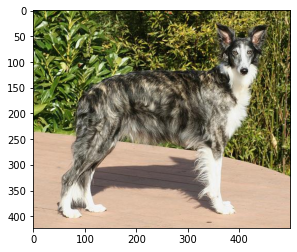

('n02090622', 'borzoi', 0.900617)
('n02106166', 'Border_collie', 0.02820007)
('n02113186', 'Cardigan', 0.014915056)
('n02091134', 'whippet', 0.014077779)
('n02123045', 'tabby', 0.008922083)
data/archive/images/50-n02085620-Chihuahua/train/n02085620_10131.jpg


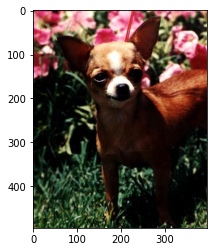

('n02085620', 'Chihuahua', 0.9979272)
('n02087046', 'toy_terrier', 0.0010279353)
('n02086910', 'papillon', 0.00047588962)
('n02107312', 'miniature_pinscher', 0.00022491957)
('n02113978', 'Mexican_hairless', 0.00011129751)
data/archive/images/100-n02106662-German_shepherd/train/n02106662_10338.jpg


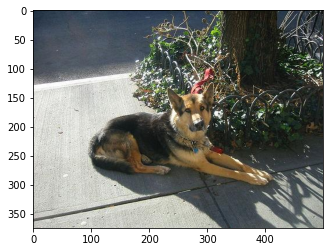

('n02106662', 'German_shepherd', 0.69462794)
('n02105412', 'kelpie', 0.0915293)
('n02107142', 'Doberman', 0.08527337)
('n02096051', 'Airedale', 0.05661745)
('n02114712', 'red_wolf', 0.012047943)


In [285]:
for elem in dog_list:
    print(elem)
    res, img = calculate_prediction(elem)
    imgplot = plt.imshow(img)
    plt.show()
    # print(res)
    for row in res:
        for col in row:
            print(col)


### Setup neural network

In [286]:
base_model = MobileNet(weights = 'imagenet', include_top = False) # imports the mobilenet model and discards the last 1000 neuron layer.
x = base_model.output
x = GlobalAveragePooling2D()(x)
# add dense layers so that the model can learn more complex functions and classify for better results
x = Dense(1024, activation = 'relu')(x)
# dense layer 2
x = Dense(1024, activation = 'relu')(x)
# dense layer 3
x = Dense(512, activation = 'relu')(x)
# final layer with softmax activation
preds = Dense(2, activation = 'softmax')(x)

### 15 img for train

In [287]:
model_15 = Model(inputs = base_model.input, outputs = preds)

for layer in model_15.layers:
    layer.trainable = False
for layer in model_15.layers[:20]:
    layer.trainable = False
for layer in model_15.layers[20:]:
    layer.trainable = True

In [288]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
    'data/archive/images/15-n02090622-borzoi/', 
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

Found 151 images belonging to 2 classes.


In [289]:
model_15.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

step_size_train = train_generator.n//train_generator.batch_size
model_15.fit_generator(generator = train_generator, steps_per_epoch = step_size_train, epochs = 8, verbose = 2)

Epoch 1/8
h:\Program Data\Documents\Visual Studio 2019\Projects\ml-test\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
4/4 - 6s - loss: 1.4755 - accuracy: 0.7311
Epoch 2/8
4/4 - 5s - loss: 0.3389 - accuracy: 0.8992
Epoch 3/8
4/4 - 5s - loss: 0.1412 - accuracy: 0.9076
Epoch 4/8
4/4 - 6s - loss: 0.1082 - accuracy: 0.8984
Epoch 5/8
4/4 - 6s - loss: 0.0743 - accuracy: 0.9766
Epoch 6/8
4/4 - 5s - loss: 0.0441 - accuracy: 1.0000
Epoch 7/8
4/4 - 5s - loss: 0.0070 - accuracy: 1.0000
Epoch 8/8
4/4 - 5s - loss: 3.8319e-04 - accuracy: 1.0000


### 50 img for train

In [290]:
model_50 = Model(inputs = base_model.input, outputs = preds)

for layer in model_50.layers:
    layer.trainable = False
for layer in model_50.layers[:20]:
    layer.trainable = False
for layer in model_50.layers[20:]:
    layer.trainable = True

In [291]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) # included in our dependencies

train_generator = train_datagen.flow_from_directory(
    'data/archive/images/50-n02085620-Chihuahua/', 
    target_size=(224,224), 
    color_mode='rgb', 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=True)

Found 152 images belonging to 2 classes.


In [292]:
model_50.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

step_size_train = train_generator.n//train_generator.batch_size
model_50.fit_generator(generator = train_generator, steps_per_epoch = step_size_train, epochs = 8, verbose = 2)

Epoch 1/8
4/4 - 7s - loss: 2.6007 - accuracy: 0.5500
Epoch 2/8
4/4 - 5s - loss: 0.7343 - accuracy: 0.7833
Epoch 3/8
4/4 - 5s - loss: 0.3764 - accuracy: 0.9297
Epoch 4/8
4/4 - 5s - loss: 0.1134 - accuracy: 0.9417
Epoch 5/8
4/4 - 5s - loss: 0.0223 - accuracy: 1.0000
Epoch 6/8
4/4 - 6s - loss: 0.0140 - accuracy: 1.0000
Epoch 7/8
4/4 - 5s - loss: 0.0018 - accuracy: 1.0000
Epoch 8/8
4/4 - 5s - loss: 1.0795e-04 - accuracy: 1.0000


### 100 img for train

In [293]:
model_100 = Model(inputs = base_model.input, outputs = preds)

for layer in model_100.layers:
    layer.trainable = False
for layer in model_100.layers[:20]:
    layer.trainable = False
for layer in model_100.layers[20:]:
    layer.trainable = True

In [294]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) # included in our dependencies

train_generator = train_datagen.flow_from_directory(
    'data/archive/images/100-n02106662-German_shepherd/', 
    target_size = (224,224), 
    color_mode = 'rgb', 
    batch_size = 32, 
    class_mode = 'categorical', 
    shuffle = True)

Found 152 images belonging to 2 classes.


In [295]:
model_100.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

step_size_train = train_generator.n//train_generator.batch_size
model_100.fit_generator(generator = train_generator, steps_per_epoch = step_size_train, epochs = 8, verbose = 2)

Epoch 1/8
4/4 - 7s - loss: 4.2429 - accuracy: 0.6417
Epoch 2/8
4/4 - 5s - loss: 0.3945 - accuracy: 0.7833
Epoch 3/8
4/4 - 6s - loss: 0.3420 - accuracy: 0.8667
Epoch 4/8
4/4 - 5s - loss: 0.1865 - accuracy: 0.9500
Epoch 5/8
4/4 - 5s - loss: 0.0872 - accuracy: 0.9417
Epoch 6/8
4/4 - 5s - loss: 0.0802 - accuracy: 0.9667
Epoch 7/8
4/4 - 5s - loss: 0.0089 - accuracy: 1.0000
Epoch 8/8
4/4 - 5s - loss: 0.0252 - accuracy: 0.9917


## Test

In [296]:
# test 15
m = {}
borzoi_test = "data/archive/images/15-n02090622-borzoi/test/"
for path in pathlib.Path(borzoi_test).iterdir():
    if path.is_file():
        # print(path)
        new_image = load_image(path)
        pred = model_15.predict(new_image)
        # print(pred)
        m[path] = pred[0]

runtime_error = []
value_error = []
for key, value in m.items():
    runtime_error.append(value[0])
    value_error.append(value[1])
data_15 = {
    'Image': list(m.keys()),
    'Runtime Error': list(runtime_error),
    'Value Error': list(value_error)
}
df_15 = pd.DataFrame.from_dict(data_15)
dfAIC = df_15.sort_values(by=['Runtime Error'])

In [297]:
# test 50
m = {}
chihuahua_test = "data/archive/images/50-n02085620-Chihuahua/test"
for path in pathlib.Path(chihuahua_test).iterdir():
    if path.is_file():
        # print(path)
        new_image = load_image(path)
        pred = model_50.predict(new_image)
        # print(pred)
        m[path] = pred[0]

runtime_error = []
value_error = []
for key, value in m.items():
    runtime_error.append(value[0])
    value_error.append(value[1])
data_50 = {
    'Image': list(m.keys()),
    'Runtime Error': list(runtime_error),
    'Value Error': list(value_error)
}
df_50 = pd.DataFrame.from_dict(data_50)
dfAIC = df_50.sort_values(by=['Runtime Error'])

In [298]:
# test 100
m = {}
shepherd_test = "data/archive/images/100-n02106662-German_shepherd/test/"
for path in pathlib.Path(shepherd_test).iterdir():
    if path.is_file():
        # print(path)
        new_image = load_image(path)
        pred = model_100.predict(new_image)
        # print(pred)
        m[path] = pred[0]

runtime_error = []
value_error = []
for key, value in m.items():
    runtime_error.append(value[0])
    value_error.append(value[1])
data_100 = {
    'Image': list(m.keys()),
    'Runtime Error': list(runtime_error),
    'Value Error': list(value_error)
}
df_100 = pd.DataFrame.from_dict(data_100)
dfAIC = df_100.sort_values(by=['Runtime Error'])

In [299]:
df_15.head(10)

,Image,Runtime Error,Value Error
0,data\archive\images\15-n02090622-borzoi\test\n...,1.000000e+00,3.435138e-14
1,data\archive\images\15-n02090622-borzoi\test\n...,3.130500e-01,6.869500e-01
2,data\archive\images\15-n02090622-borzoi\test\n...,7.398480e-14,1.000000e+00
3,data\archive\images\15-n02090622-borzoi\test\n...,9.998344e-01,1.655178e-04
4,data\archive\images\15-n02090622-borzoi\test\n...,1.000000e+00,2.012359e-20
5,data\archive\images\15-n02090622-borzoi\test\n...,1.000000e+00,4.317981e-22
6,data\archive\images\15-n02090622-borzoi\test\n...,1.000000e+00,1.048496e-28
7,data\archive\images\15-n02090622-borzoi\test\n...,1.000000e+00,8.167767e-10
8,data\archive\images\15-n02090622-borzoi\test\n...,5.008544e-01,4.991455e-01
9,data\archive\images\15-n02090622-borzoi\test\n...,1.000000e+00,5.768442e-25


In [300]:
df_50.head(10)

,Image,Runtime Error,Value Error
0,data\archive\images\50-n02085620-Chihuahua\tes...,1.728871e-18,1.000000e+00
1,data\archive\images\50-n02085620-Chihuahua\tes...,1.000000e+00,3.221235e-31
2,data\archive\images\50-n02085620-Chihuahua\tes...,7.067824e-12,1.000000e+00
3,data\archive\images\50-n02085620-Chihuahua\tes...,1.000000e+00,1.007989e-30
4,data\archive\images\50-n02085620-Chihuahua\tes...,1.000000e+00,1.225096e-28
5,data\archive\images\50-n02085620-Chihuahua\tes...,1.000000e+00,7.101921e-30
6,data\archive\images\50-n02085620-Chihuahua\tes...,9.999547e-01,4.528873e-05
7,data\archive\images\50-n02085620-Chihuahua\tes...,1.000000e+00,9.759338e-12
8,data\archive\images\50-n02085620-Chihuahua\tes...,1.000000e+00,1.687237e-26
9,data\archive\images\50-n02085620-Chihuahua\tes...,9.999965e-01,3.478470e-06


In [301]:
df_100.head(10)

,Image,Runtime Error,Value Error
0,data\archive\images\100-n02106662-German_sheph...,1.0,2.404304e-26
1,data\archive\images\100-n02106662-German_sheph...,1.0,6.691057e-23
2,data\archive\images\100-n02106662-German_sheph...,1.0,1.086030e-35
3,data\archive\images\100-n02106662-German_sheph...,1.0,5.926049e-23
4,data\archive\images\100-n02106662-German_sheph...,1.0,7.812620e-15
5,data\archive\images\100-n02106662-German_sheph...,1.0,2.474004e-23
6,data\archive\images\100-n02106662-German_sheph...,1.0,3.869262e-26
7,data\archive\images\100-n02106662-German_sheph...,1.0,3.705054e-34
8,data\archive\images\100-n02106662-German_sheph...,1.0,4.116163e-36
9,data\archive\images\100-n02106662-German_sheph...,1.0,1.920200e-19


### function to load image

In [302]:
def load_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    return img_tensor